In [2]:
# the standard boilerplate stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr
from IPython.display import HTML, display
from pandas import Series, DataFrame

np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns',500)

In [3]:
# turn off matplotlib interactive mode
plt.ioff()

A game of football has much more scope for analysis than the commonly used statistics like number of goals, number of cards etc. To analyze the events and their impact and also the betting stats, lets look at a secondary dataset

In [4]:
events = pd.read_csv('events.csv')
display(HTML(events.head().to_html()))

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [5]:
events.shape

(941009, 22)

So we have almost a million events in the dataset

We have one more file in the dataset. Lets look at it as well

In [6]:
ginf = pd.read_csv("ginf.csv")
display(HTML(ginf.head().to_html()))

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [7]:
ginf = ginf[['id_odsp', 'date', 'league', 'season','country']]

In [9]:
display(HTML(ginf.head().to_html()))

,id_odsp,date,league,season,country
0,UFot0hit/,2011-08-05,D1,2012,germany
1,Aw5DflLH/,2011-08-06,D1,2012,germany
2,bkjpaC6n/,2011-08-06,D1,2012,germany
3,CzPV312a/,2011-08-06,F1,2012,france
4,GUOdmtII/,2011-08-06,F1,2012,france


This dataset uses cryptic names like D1, F1 etc for the leagues. Lets replace the values to have the same set of names that we used in the original match result dataset

In [10]:
ginf.groupby(['league','country']).nunique()

,,id_odsp,date,league,season,country
league,country,,,,,
D1,germany,1690,526,1,6,1
E0,england,2120,553,1,6,1
F1,france,2107,594,1,6,1
I1,italy,2106,541,1,6,1
SP1,spain,2089,681,1,6,1


In [11]:
league_map = {'E0': 'EPL', 'SP1': 'LaLiga','I1': 'SerieA', 'F1': 'Ligue1', 'D1': 'Bundesliga'}

In [12]:
ginf['league'] = ginf['league'].map(league_map)

Lets merge the two dataframes together

In [13]:
events = events.merge(ginf, how='left')
display(HTML(events.head().to_html()))

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,date,league,season,country
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,2011-08-05,Bundesliga,2012,germany
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,2011-08-05,Bundesliga,2012,germany
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,2011-08-05,Bundesliga,2012,germany
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0,2011-08-05,Bundesliga,2012,germany
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0,2011-08-05,Bundesliga,2012,germany


The data has a lot of columns with cryptic numeric values. Lets use the dictionary file to replace the cryptic values with meaningful data instead

In [14]:
event_type = {
    0:'Announcement',
    1:'Attempt',
    2:'Corner',
    3:'Foul',
    4:'Yellow card',
    5:'Second yellow card',
    6:'Red card',
    7:'Substitution',
    8:'Free kick won',
    9:'Offside',
    10:'Hand ball',
    11:'Penalty conceded'}

In [15]:
event_type2 = {12:'Key Pass', 13:'Failed through ball', 14:'Sending off', 15:'Own goal'}


In [16]:
events['event_type']=events['event_type'].map(event_type)
events['event_type2']=events['event_type2'].map(event_type2)

In [17]:
events['side']=events['side'].map({1:"Home",2:"Away"})

In [18]:
events['situation']=events['situation'].map({1:"Open play",2:"Set piece",3:"Corner",4:"Free kick"})

In [19]:
events['assist_method']=events['assist_method'].map({
    0:None,
    1:"Pass",
    2:"Cross",
    3:"Headed pass",
    4:"Through ball"
})

In [20]:
events['bodypart']=events['bodypart'].map({
    1:"right foot",
    2:"left foot",
    3:"head"

})

In [21]:
events['location']=events['location'].map({
    1:'Attacking half',
    2:'Defensive half',
    3:'Centre of the box',
    4:'Left wing',
    5:'Right wing',
    6:'Difficult angle and long range',
    7:'Difficult angle on the left',
    8:'Difficult angle on the right',
    9:'Left side of the box',
    10:'Left side of the six yard box',
    11:'Right side of the box',
    12:'Right side of the six yard box',
    13:'Very close range',
    14:'Penalty spot',
    15:'Outside the box',
    16:'Long range',
    17:'More than 35 yards',
    18:'More than 40 yards',
    19:'Not recorded'

})

In [22]:
events['shot_outcome']=events['shot_outcome'].map({
    1:'On target',
    2:'Off target',
    3:'Blocked',
    4:'Hit the bar'
})

In [23]:
events['shot_place']=events['shot_place'].map({
    1:'Bit too high',
	2:'Blocked',
	3:'Bottom left corner',
	4:'Bottom right corner',
	5:'Centre of the goal',
	6:'High and wide',
	7:'Hits the bar',
	8:'Misses to the left',
	9:'Misses to the right',
	10:'Too high',
	11:'Top centre of the goal',
	12:'Top left corner',
	13:'Top right corner'
})

In [25]:
events['season'] = events.apply(
    lambda row: str(row['season']-1) + "-"+ str(row['season']),
    axis=1
)

Lets look at the dataset once again now

In [26]:
display(HTML(events.head().to_html()))

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,date,league,season,country
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Key Pass,Away,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,High and wide,Off target,0,Left side of the box,left foot,Pass,Open play,0,2011-08-05,Bundesliga,2011-2012,germany
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,NaN,Home,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0,2011-08-05,Bundesliga,2011-2012,germany
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,NaN,Home,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0,2011-08-05,Bundesliga,2011-2012,germany
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,NaN,Home,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0,2011-08-05,Bundesliga,2011-2012,germany
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,NaN,Away,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,Defensive half,NaN,None,NaN,0,2011-08-05,Bundesliga,2011-2012,germany


Now the event dataset is ready for analysis

Lets visualize the frequency of each type of event

<Figure size 432x288 with 0 Axes>

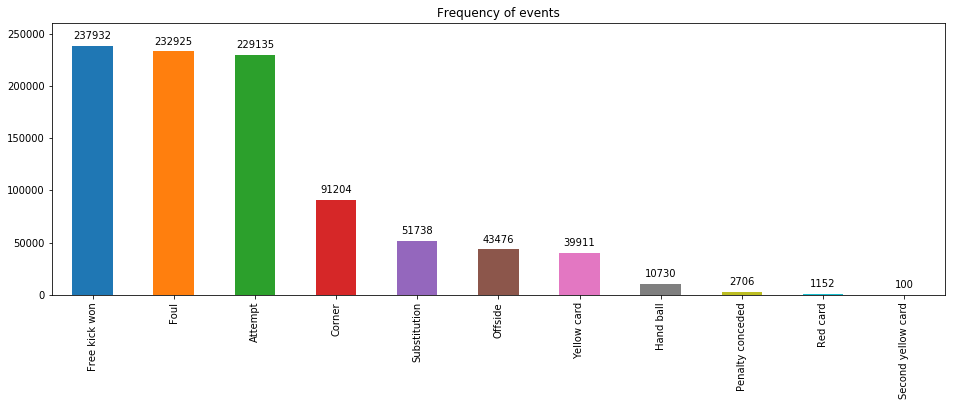

In [27]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = events['event_type'].value_counts().plot(kind='bar')
ax.set_ylim(0, 260000) 
ax.set_title('Frequency of events')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

Overall, the most frequent events are :
1. Free kick won
2. Foul
3. Attempt

Lets look at a league wise view of the number of events

a) <b> English Premier League </b>

<Figure size 432x288 with 0 Axes>

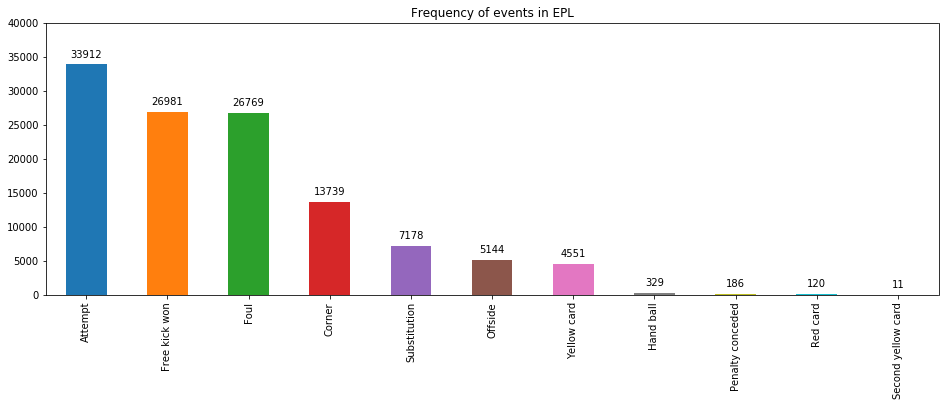

In [29]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
epl = events[events['league']=='EPL']
ax = epl['event_type'].value_counts().plot(kind='bar')
ax.set_ylim(0, 40000) 
ax.set_title('Frequency of events in EPL')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

Foul moves from no 2 to no 3 position. This is consistent with our observation from the previous dataset that EPL has lesser number of fouls

b) <b> La Liga </b>

<Figure size 432x288 with 0 Axes>

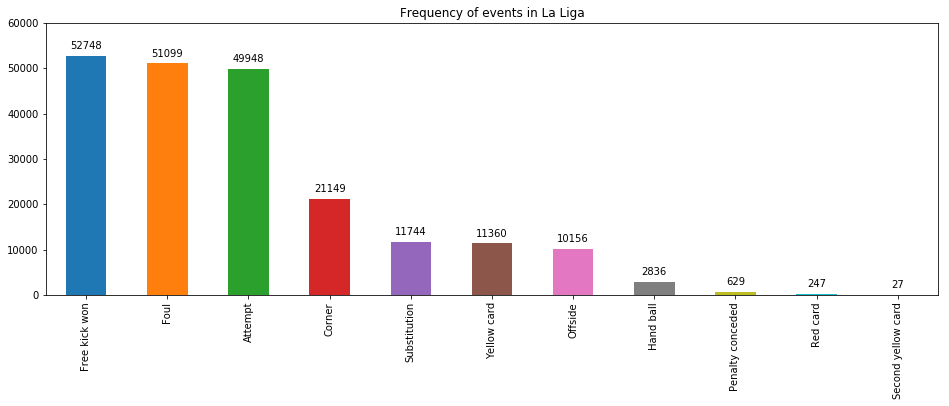

In [30]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
laliga = events[events['league']=='LaLiga']
ax = laliga['event_type'].value_counts().plot(kind='bar')
ax.set_ylim(0, 60000) 
ax.set_title('Frequency of events in La Liga')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

c) <b> Serie A </b>

<Figure size 432x288 with 0 Axes>

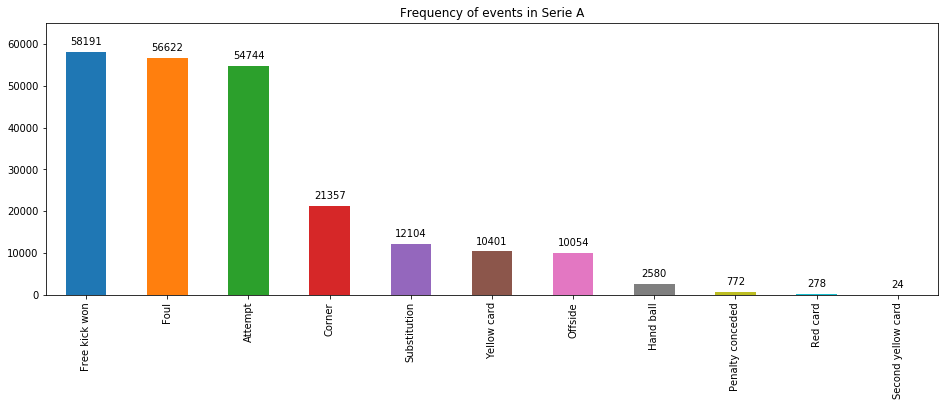

In [32]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
serieA = events[events['league']=='SerieA']
ax = serieA['event_type'].value_counts().plot(kind='bar')
ax.set_ylim(0, 65000) 
ax.set_title('Frequency of events in Serie A')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

d) <b> Bundesliga </b>

<Figure size 432x288 with 0 Axes>

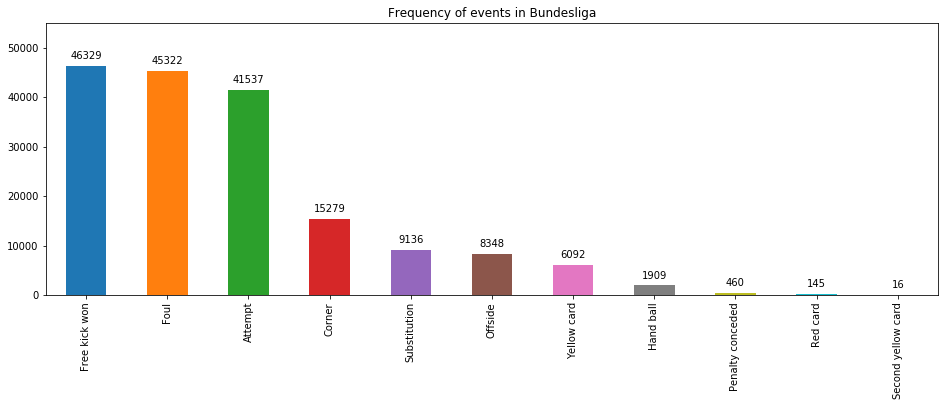

In [33]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
bundesliga = events[events['league']=='Bundesliga']
ax = bundesliga['event_type'].value_counts().plot(kind='bar')
ax.set_ylim(0, 55000) 
ax.set_title('Frequency of events in Bundesliga')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

e) <b> Ligue One </b>

<Figure size 432x288 with 0 Axes>

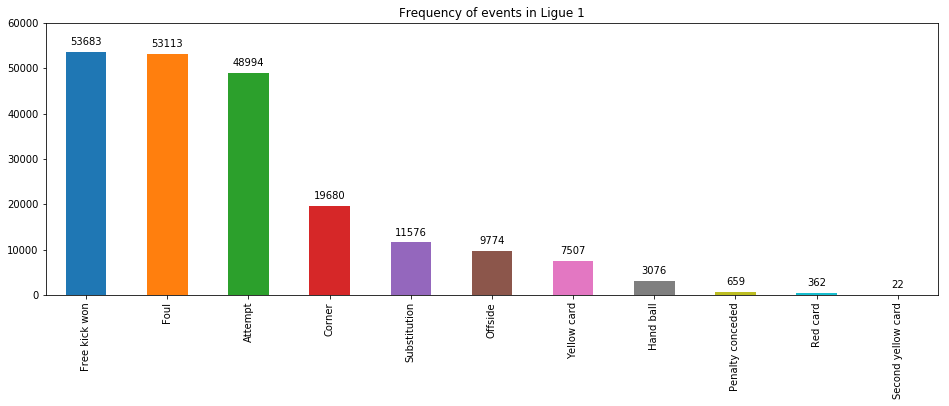

In [34]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ligue1 = events[events['league']=='Ligue1']
ax = ligue1['event_type'].value_counts().plot(kind='bar')
ax.set_ylim(0, 60000) 
ax.set_title('Frequency of events in Ligue 1')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

So the top 3 events in every league are Free kick won, Fouls and Attempts. EPL witnesses almost half the number of Fouls as LaLiga even though both the leagues involve equal number of games per season

## Where to shoot if you want to score a goal ?

Lets look at the shots that resulted in goals

In [35]:
goals = events[(events['event_type'] == 'Attempt') & (events['is_goal'] == 1)]

<Figure size 432x288 with 0 Axes>

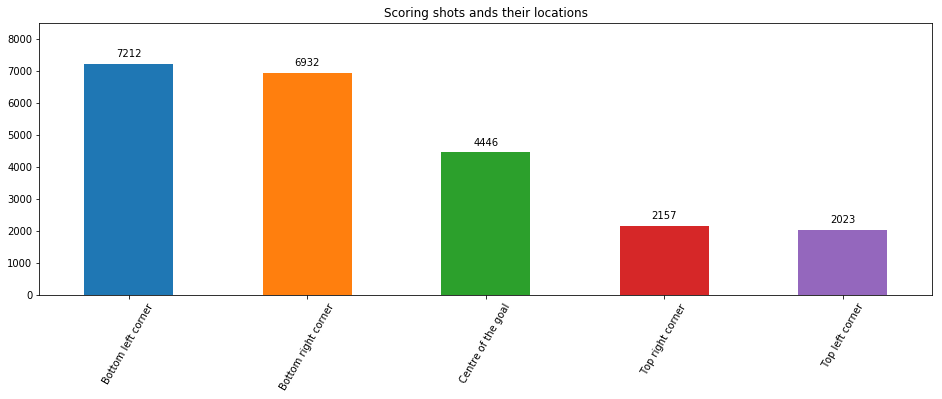

In [36]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = goals['shot_place'].value_counts().plot(kind='bar', rot=60)
ax.set_ylim(0, 8500) 
ax.set_title('Scoring shots ands their locations')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

The data suggests that its more effective to shoot at the bottom than to shoot at the top or centre

Lets have a look at the missed attempts as well

In [37]:
non_goals = events[(events['event_type'] == 'Attempt') & (events['is_goal'] == 0)]

<Figure size 432x288 with 0 Axes>

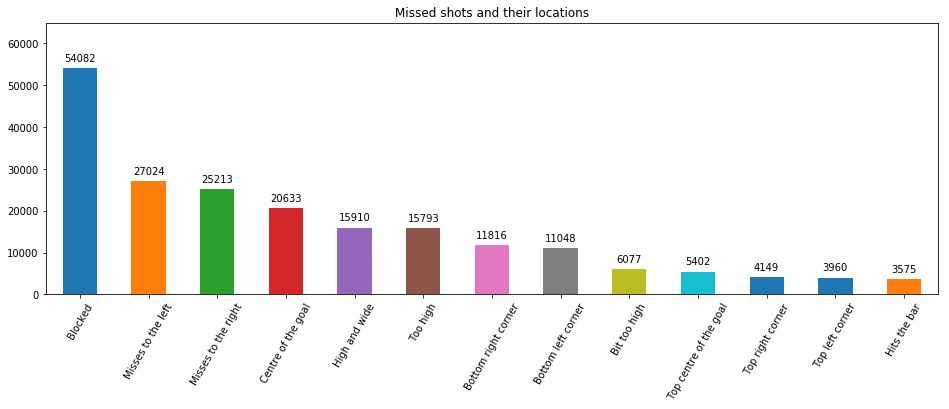

In [38]:
plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = non_goals['shot_place'].value_counts().plot(kind='bar', rot=60)
ax.set_ylim(0, 65000) 
ax.set_title('Missed shots and their locations')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

The number of saves in bottom left/right corner is quite low as opposed to centre of the box

There are fewer saves at top left/right corner but the chances of missing are high (might hit the bar or may be too high)

So, we can conclude that bottom right or left corners are the best locations to aim at while trying to score a goal

## Which teams and players are the most prolific scorers ?

Lets have a look at the most heavily scoring teams first

<Figure size 432x288 with 0 Axes>

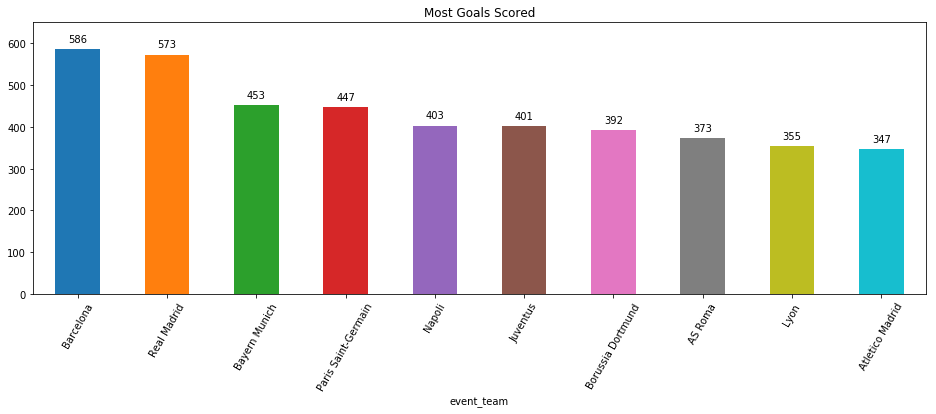

In [39]:
goals_grouping_by_team = goals.groupby('event_team')
goals_grouping_by_team = goals_grouping_by_team.count().sort_values(by='id_event', ascending=False)[:10]

plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = goals_grouping_by_team['id_event'].plot(kind='bar', rot=60)
ax.set_ylim(0, 650) 
ax.set_title('Most Goals Scored')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()


Barcelona and Real Madrid are at the top. This is also in line with our observation that La Liga witnesses max number of goals.

Interestingly none of the EPL teams make it to this list

Lets have a look at most prolific individual scorers now

<Figure size 432x288 with 0 Axes>

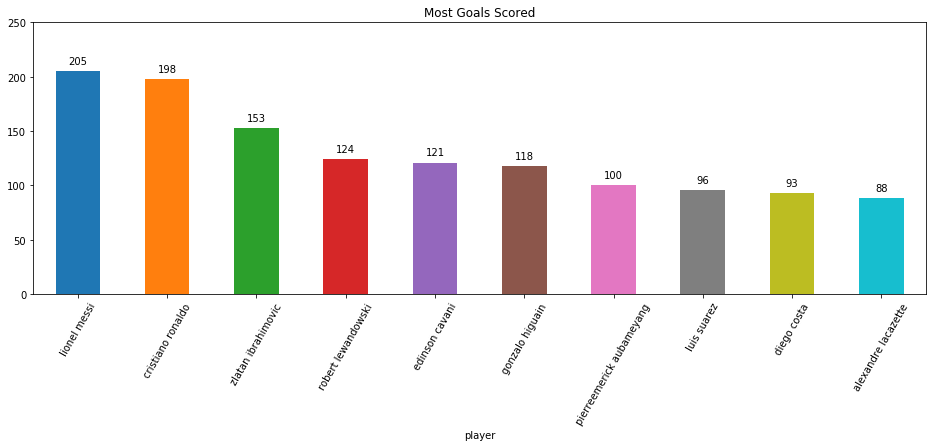

In [40]:
goals_grouping_by_player = goals.groupby('player')
goals_grouping_by_player = goals_grouping_by_player.count().sort_values(by='id_event', ascending=False)[:10]

plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = goals_grouping_by_player['id_event'].plot(kind='bar', rot=60)
ax.set_ylim(0, 250) 
ax.set_title('Most Goals Scored')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

No surprises there in the top two names !!!

Zlatan Ibrahimovic is the only player to make it to this list after playing in two different leagues during this period

The players in the above chart might have high number of misses as well. Lets look at the players with maximum number of missed attempts

<Figure size 432x288 with 0 Axes>

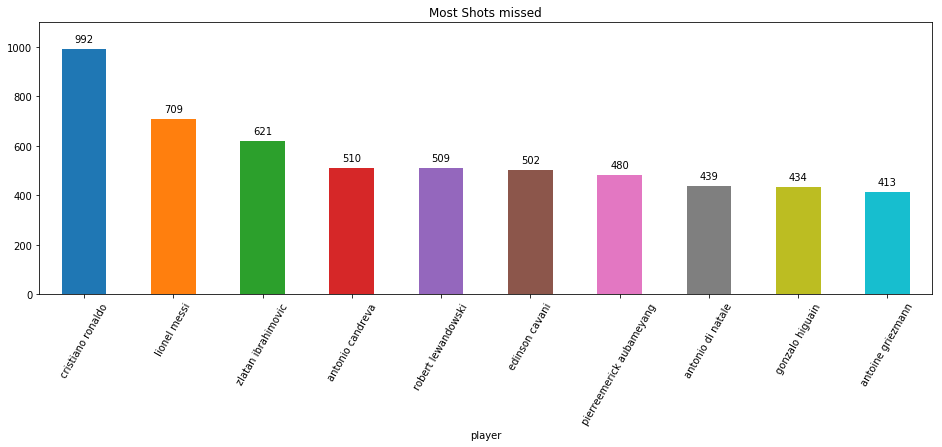

In [41]:
misses_grouping_by_player = non_goals.groupby('player')
misses_grouping_by_player = misses_grouping_by_player.count().sort_values(by='id_event', ascending=False)[:10]

plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = misses_grouping_by_player['id_event'].plot(kind='bar', rot=60)
ax.set_ylim(0, 1100) 
ax.set_title('Most Shots missed')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

The top 3 are still Christiano Ronaldo, Lionel Messi and Zlatan Ibrahimovic

Let's have a look at total number of Attempts as well

In [42]:
attempts = events[(events['event_type'] == 'Attempt') ]

<Figure size 432x288 with 0 Axes>

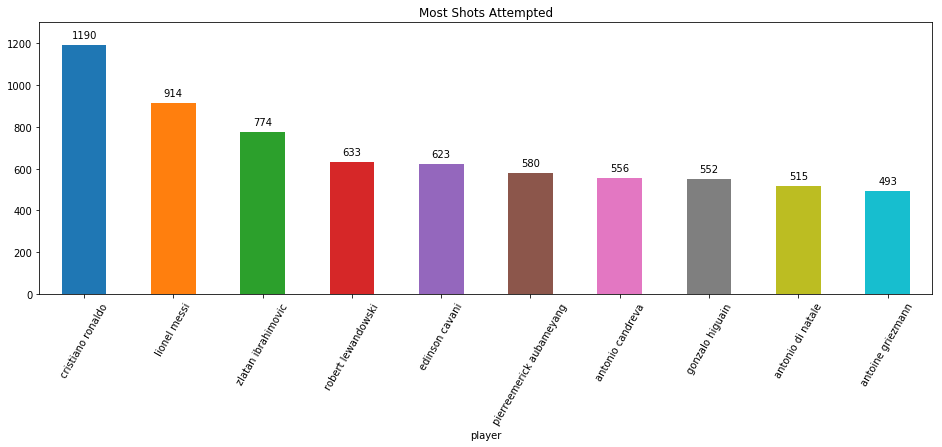

In [43]:
attempts_grouping_by_player = attempts.groupby('player')
attempts_grouping_by_player = attempts_grouping_by_player.count().sort_values(by='id_event', ascending=False)[:10]

plt.cla()
plt.clf()
f, axes = plt.subplots(1, 1 , figsize=(16,5))
ax = attempts_grouping_by_player['id_event'].plot(kind='bar', rot=60)
ax.set_ylim(0, 1300) 
ax.set_title('Most Shots Attempted')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

No wonder Christiano Ronaldo is considered as one of the greatest forwards of all time. He is almost 20 % ahead of Messi at second position